# Plot or compare one or more Cloudy Thin Shell Runs

In [1]:
import os
os.getcwd()

'/Users/long/Projects/Cloudy_converge'

In [2]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import roman

In [3]:
def read_cloudy(filename='cl_helium_PL.dat',xdir='.'):
    xfile='%s/%s' % (xdir,filename)
    try:
        x=ascii.read(xfile)
    except:
        print('Error: Could not find %s' % xfile)
        return None
    # x.info()
    names=x.colnames
    x.rename_column('col1','ip')
    j=1
    while j<len(names):
        x.rename_column(names[j],'i%02d' % (j))
        j+=1
    return x

read_cloudy()

ip,i01,i02,i03
float64,float64,float64,float64
-8.0,0.985,0.0146,4.51e-06
-7.9,0.983,0.0169,5.99e-06
-7.8,0.98,0.0195,7.95e-06
-7.7,0.977,0.0227,1.06e-05
-7.6,0.974,0.0263,1.4e-05
-7.5,0.97,0.0305,1.86e-05
...,...,...,...
6.4,1.38e-27,2.29e-13,1.0
6.5,8.35e-28,1.78e-13,1.0


In [10]:
XLAB=[
['hydrogen','H'],
['helium','He'],
['carbon','C'],
['nitrogen','N'],
['oxygen','O'],
['iron','Fe']
 ]

In [11]:
def get_label(word='foo_oxygen'):
    i=0
    while i<len(XLAB):
        if word.count(XLAB[i][0]):
            return XLAB[i][1]
        i+=1
    return 'XX'

get_label('xcarbon')

'C'

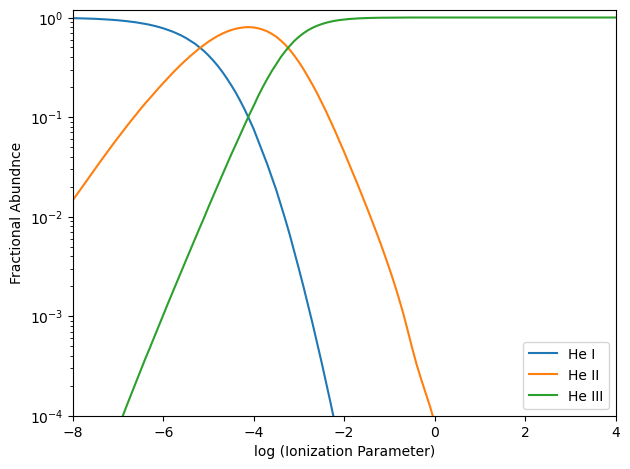

In [19]:

def plot_cloudy(cloudy='cl_helium_PL.dat',xdir='.',ydir='',imin=0,imax=0,ipmin=-8,ipmax=4):
    
    
    xc=read_cloudy(cloudy,xdir)

 
    if ydir!='':
        yc=read_cloudy(cloudy,ydir)
        two='yes'

    
    element=get_label(cloudy)
    
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    colname=xc.colnames
    if imin<=0:
        i=1
    else:
        i=imin

    if imax<=0 or imax+1>len(colname):
        imax=len(colname)
    else:
        imax=imax+1
    color_index=0
    while i<imax:
        xlabel='%s %s' % (element,roman.toRoman(i))
        plt.semilogy(xc['ip'],xc[colname[i]],'-',color=color_cycle[color_index],label=xlabel)
        if ydir!='':
            plt.semilogy(yc['ip'],yc[colname[i]],':',color=color_cycle[color_index])
        i+=1
        color_index+=1
        if color_index==len(color_cycle):
            color_index=0
    plt.legend()
    plt.xlabel('log (Ionization Parameter)')
    plt.ylabel('Fractional Abundnce')
    plt.ylim(1e-4,1.2)
    if ipmin!=0 or ipmax!=0:
        plt.xlim(ipmin,ipmax)
    plt.tight_layout()

plot_cloudy()

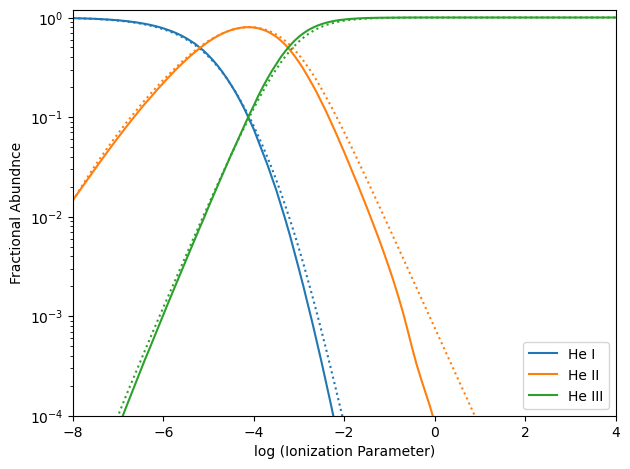

In [20]:
plot_cloudy(cloudy='cl_helium_PL.dat',xdir='.',ydir='../Cloudy/',imin=0,imax=0,ipmin=-8,ipmax=4)

In [ ]:
'cl_oxygen_PL.dat'

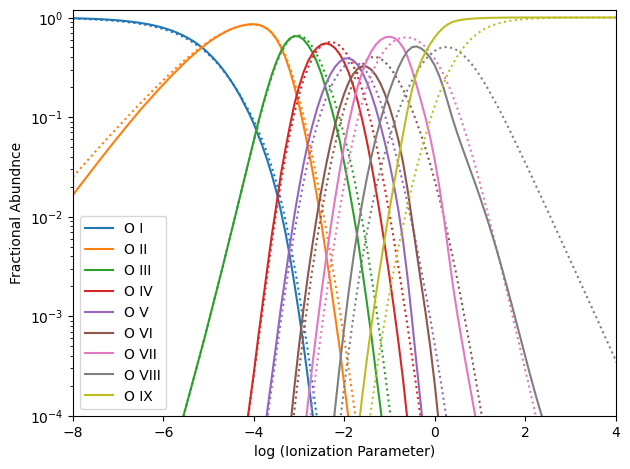

In [21]:
plot_cloudy(cloudy='cl_oxygen_PL.dat',xdir='.',ydir='../Cloudy/',imin=0,imax=0,ipmin=-8)

/var/folders/tq/5yb4qm590qxbk0ykb4ft0nyc000401/T/ipykernel_45705/2329826591.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


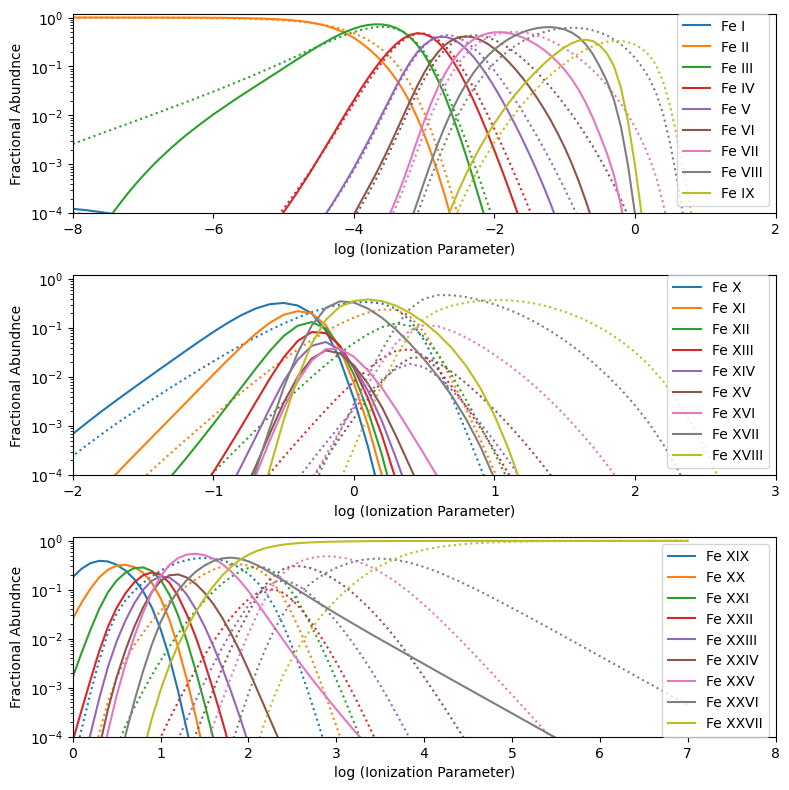

In [23]:
def do_fe(cloudy='cl_iron_PL.dat',python='py_Fe_pl.txt'):
    plt.figure(1,(8,8))
    plt.subplot(3,1,1)
    plot_cloudy(cloudy,xdir='.',ydir='../Cloudy/',imax=9,ipmin=-8,ipmax=2)
    plt.subplot(3,1,2)
    plot_cloudy(cloudy,xdir='.',ydir='../Cloudy/',imin=10,imax=18,ipmin=-2,ipmax=3)
    plt.subplot(3,1,3)
    plot_cloudy(cloudy,xdir='.',ydir='../Cloudy/',imin=19,imax=27,ipmin=0,ipmax=8)

do_fe()